 ## Part 1: Pure Python Implementation

1. Defining functions for vector and matrix operations

In [10]:
def dot_product(a,b):
  return sum(x*y for x,y in zip(a,b))


def vector_add(a,b):
  return [x+y for x,y in zip(a,b)]


def vector_subtract(a,b):
  return [x-y for x,y in zip(a,b)]


def scaler_vector_multiply(a,b):
  return [a*v for v in b]


def matrix_vector_multiply(a,b):
  return [dot_product(x,b) for x in a]


def transpose(a):
  return list(map(list, zip(*a)))

2. Mean Squared Error Calculation

In [11]:
def mse(prediction,label):
  s = len(label)
  return sum((p-l)**2 for p,l in zip(prediction,label))/(2*s)

3. Gradient Descent Algorithm

- Hyperparamters : Learning Rate, Epochs

In [12]:
def gradient_descent(X,y,alpha=0.1,epochs=1000):
  m = len(X)
  n = len(X[0])

  weights = [0.0]*n
  bias = 0.0
  cost_history = []

  for epoch in range(epochs):
    yp = [dot_product(x_row, weights) + bias for x_row in X]
    error = vector_subtract(yp,y)
    dw = scaler_vector_multiply(1/m, matrix_vector_multiply(transpose(X), error))
    db = 1/m * sum(error)

    weights = vector_subtract(weights, scaler_vector_multiply(alpha, dw))
    bias = bias - alpha*db

    cost = mse(yp,y)
    cost_history.append(cost)

    if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
      break

  return weights, bias, cost_history

4. Standardization

In [13]:
def standardize(X):
    m = len(X)
    n = len(X[0])

    means = [sum(X[i][j] for i in range(m)) / m for j in range(n)]

    stds = []
    for j in range(n):
        variance = sum((X[i][j] - means[j]) ** 2 for i in range(m)) / m
        std_dev = variance ** 0.5
        stds.append(std_dev if std_dev > 0 else 1.0)

    X_std = []
    for i in range(m):
        std_row = [(X[i][j] - means[j]) / stds[j] for j in range(n)]
        X_std.append(std_row)

    return X_std, means, stds

def standardize_y(y):
    mean = sum(y) / len(y)
    variance = sum((yi - mean) ** 2 for yi in y) / len(y)
    std_dev = variance ** 0.5 if variance > 0 else 1.0
    y_std = [(yi - mean) / std_dev for yi in y]
    return y_std, mean, std_dev

5. Prediction

In [14]:
def predict(X, weights, bias, y_mean, y_std):
    y_std_pred = [dot_product(x_row, weights) + bias for x_row in X]
    predictions = [yp * y_std + y_mean for yp in y_std_pred]
    return predictions

6. Load csv (Equivalent to read_csv function of pandas)

In [15]:
def load_csv_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    data = [list(map(float, line.strip().split(','))) for line in lines[1:]]
    X = [row[:-1] for row in data]
    y = [row[-1] for row in data]
    return X, y

X, y = load_csv_data("data.csv")

7. Evaluation Metrics

- MAE
- RMSE
- R2 Score

In [16]:
def mae(y_pred, y_true):
    n = len(y_true)
    return sum(abs(p - t) for p, t in zip(y_pred, y_true)) / n

def rmse(y_pred, y_true):
    n = len(y_true)
    return (sum((p - t)**2 for p, t in zip(y_pred, y_true)) / n) ** 0.5

def r2_score(y_pred, y_true):
    mean_y = sum(y_true) / len(y_true)
    ss_total = sum((t - mean_y) ** 2 for t in y_true)
    ss_residual = sum((t - p) ** 2 for t, p in zip(y_true, y_pred))
    return 1 - (ss_residual / ss_total)


8. Cost Convergence Graph

In [17]:
import matplotlib.pyplot as plt

def plot_loss(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss Curve for pure Python Implementation")
    plt.grid(True)
    plt.show()


### Main function for evaluating above algorithms

Training Time: 115.34206581115723
Final Cost: 0.12911088127459747
Final Weights: [0.012434977337750473, 0.4491861058102219, 0.016466621366517005, 0.004545011744928245, 0.04987437210271419, 0.015577111810111814, 0.044851098597329137, -0.2148651647993513, 0.08562900071437457, -0.04595971447632907, 0.2779467395140932, -0.06039062943318711, -0.07130976613989948, -0.10140549355908471, -0.050593551864338934, 0.04310441533374092, -0.06832413746747003, 0.05407964911476583, -0.1989656863971023, 0.0212935723870752, -0.05356496404705542, 0.020904108913186645, 0.12470448490371464, 0.050596649510712084, 0.012261638994777006, -0.02273900973218432, 0.18959784658515144]
Final Bias: 0.018989681038615452
Training MAE: 42165.08718923965
Training RMSE: 57685.42946170322
Training R2 Score: 0.7417820104991374
Testing MAE: 48358.81382501458
Testing RMSE: 66129.69758484242
Testing R2 Score: 0.6998859902517196


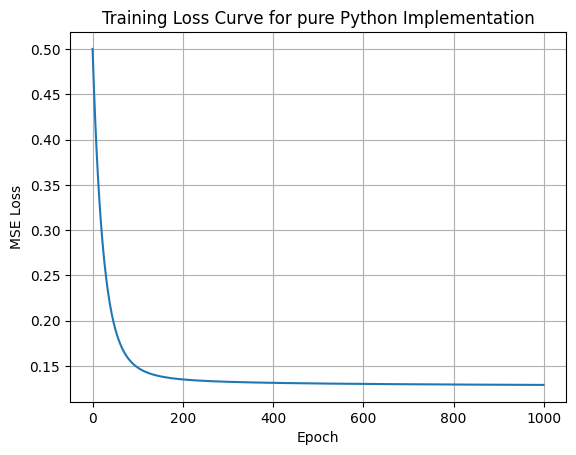

In [22]:
import time

def main():
    X, y = load_csv_data("data.csv")
    
    X_std, means, stds = standardize(X)
    
    train_size = int(0.8 * len(X))
    X_train = X_std[:train_size]
    X_test = X_std[train_size:]
    y_train_raw = y[:train_size]
    y_test = y[train_size:]
    
    y_train, y_mean, y_std_dev = standardize_y(y_train_raw)

    start_time = time.time()
    weights, bias, cost_history = gradient_descent(X_train, y_train, alpha=0.01, epochs=1000)
    end_time = time.time()
    
    print("Training Time:", end_time - start_time)
    print("Final Cost:", cost_history[-1])
    print("Final Weights:", weights)
    print("Final Bias:", bias)
    
    predictions_train = predict(X_train, weights, bias, y_mean, y_std_dev)
    predictions_test = predict(X_test, weights, bias, y_mean, y_std_dev)
    
    print("Training MAE:", mae(predictions_train, y_train_raw))
    print("Training RMSE:", rmse(predictions_train, y_train_raw))    
    print("Training R2 Score:", r2_score(predictions_train, y_train_raw))
    
    print("Testing MAE:", mae(predictions_test, y_test))
    print("Testing RMSE:", rmse(predictions_test, y_test))
    print("Testing R2 Score:", r2_score(predictions_test, y_test))
    
    plot_loss(cost_history)
    
if __name__ == "__main__":
    main()
    
    